In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

path2add = os.path.normpath(os.path.abspath('..'))
if path2add not in sys.path:
    sys.path.append(path2add)

import torch
from torch_geometric.data import Data
from dataloader import AugmentGraphTextDataset
from augment import  EdgePerturbation, NodeDrop, Subgraph, AttributeMask
import networkx as nx
import numpy as np
from transformers import AutoTokenizer

from functools import partial

from matplotlib import pyplot as plt

In [3]:
def display(edges):
    G = nx.DiGraph()
    for i in range(len(edges[0])):
        G.add_edge(int(edges[0][i]), int(edges[1][i]))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=False, font_size=8, node_color='skyblue', node_size=200, edge_color='gray', linewidths=0.3, arrows=False)

In [4]:
model_name = 'nlpie/distil-biobert'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [5]:
def transform_augment(sample, augment):
    tmp = sample.clone()
    if tmp.x.shape[0] > 6:
        tmp = augment(tmp)

    data = Data(
        x=sample.x,
        edge_index=sample.edge_index,
        x_augment=tmp.x,
        edge_index_augment=tmp.edge_index,
        input_ids=sample.input_ids,
        attention_mask=sample.attention_mask,
        description=sample.description,
    )
    return data

In [7]:
gt = np.load("../data/token_embedding_dict.npy", allow_pickle=True)[()]
train_dataset = AugmentGraphTextDataset(
    root="../data/",
    gt=gt,
    split="train",
    tokenizer=tokenizer,
    model_name=model_name,
    transform=partial(transform_augment, augment=EdgePerturbation(ratio=0.2)),
)

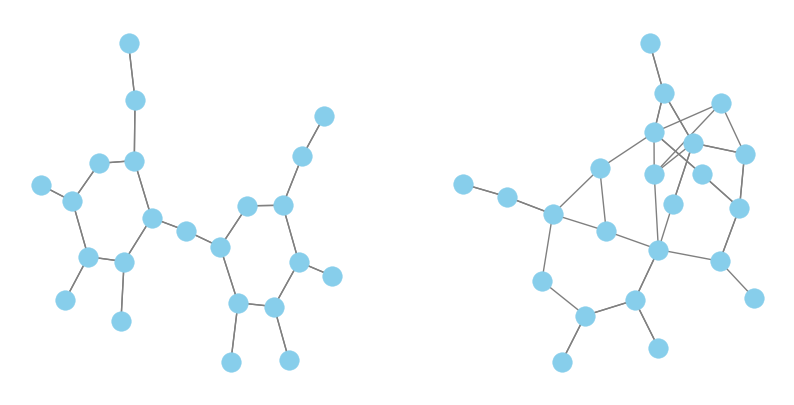

In [8]:
sample = train_dataset[9875]

plt.figure(figsize=(10, 5))
plt.subplot(121)
display(sample.edge_index)
plt.subplot(122)
display(sample.edge_index_augment)
plt.savefig("augment_drop_node.png", dpi=300, transparent=True)

In [18]:
rnd_idx = np.random.randint(0, len(train_dataset), 16)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

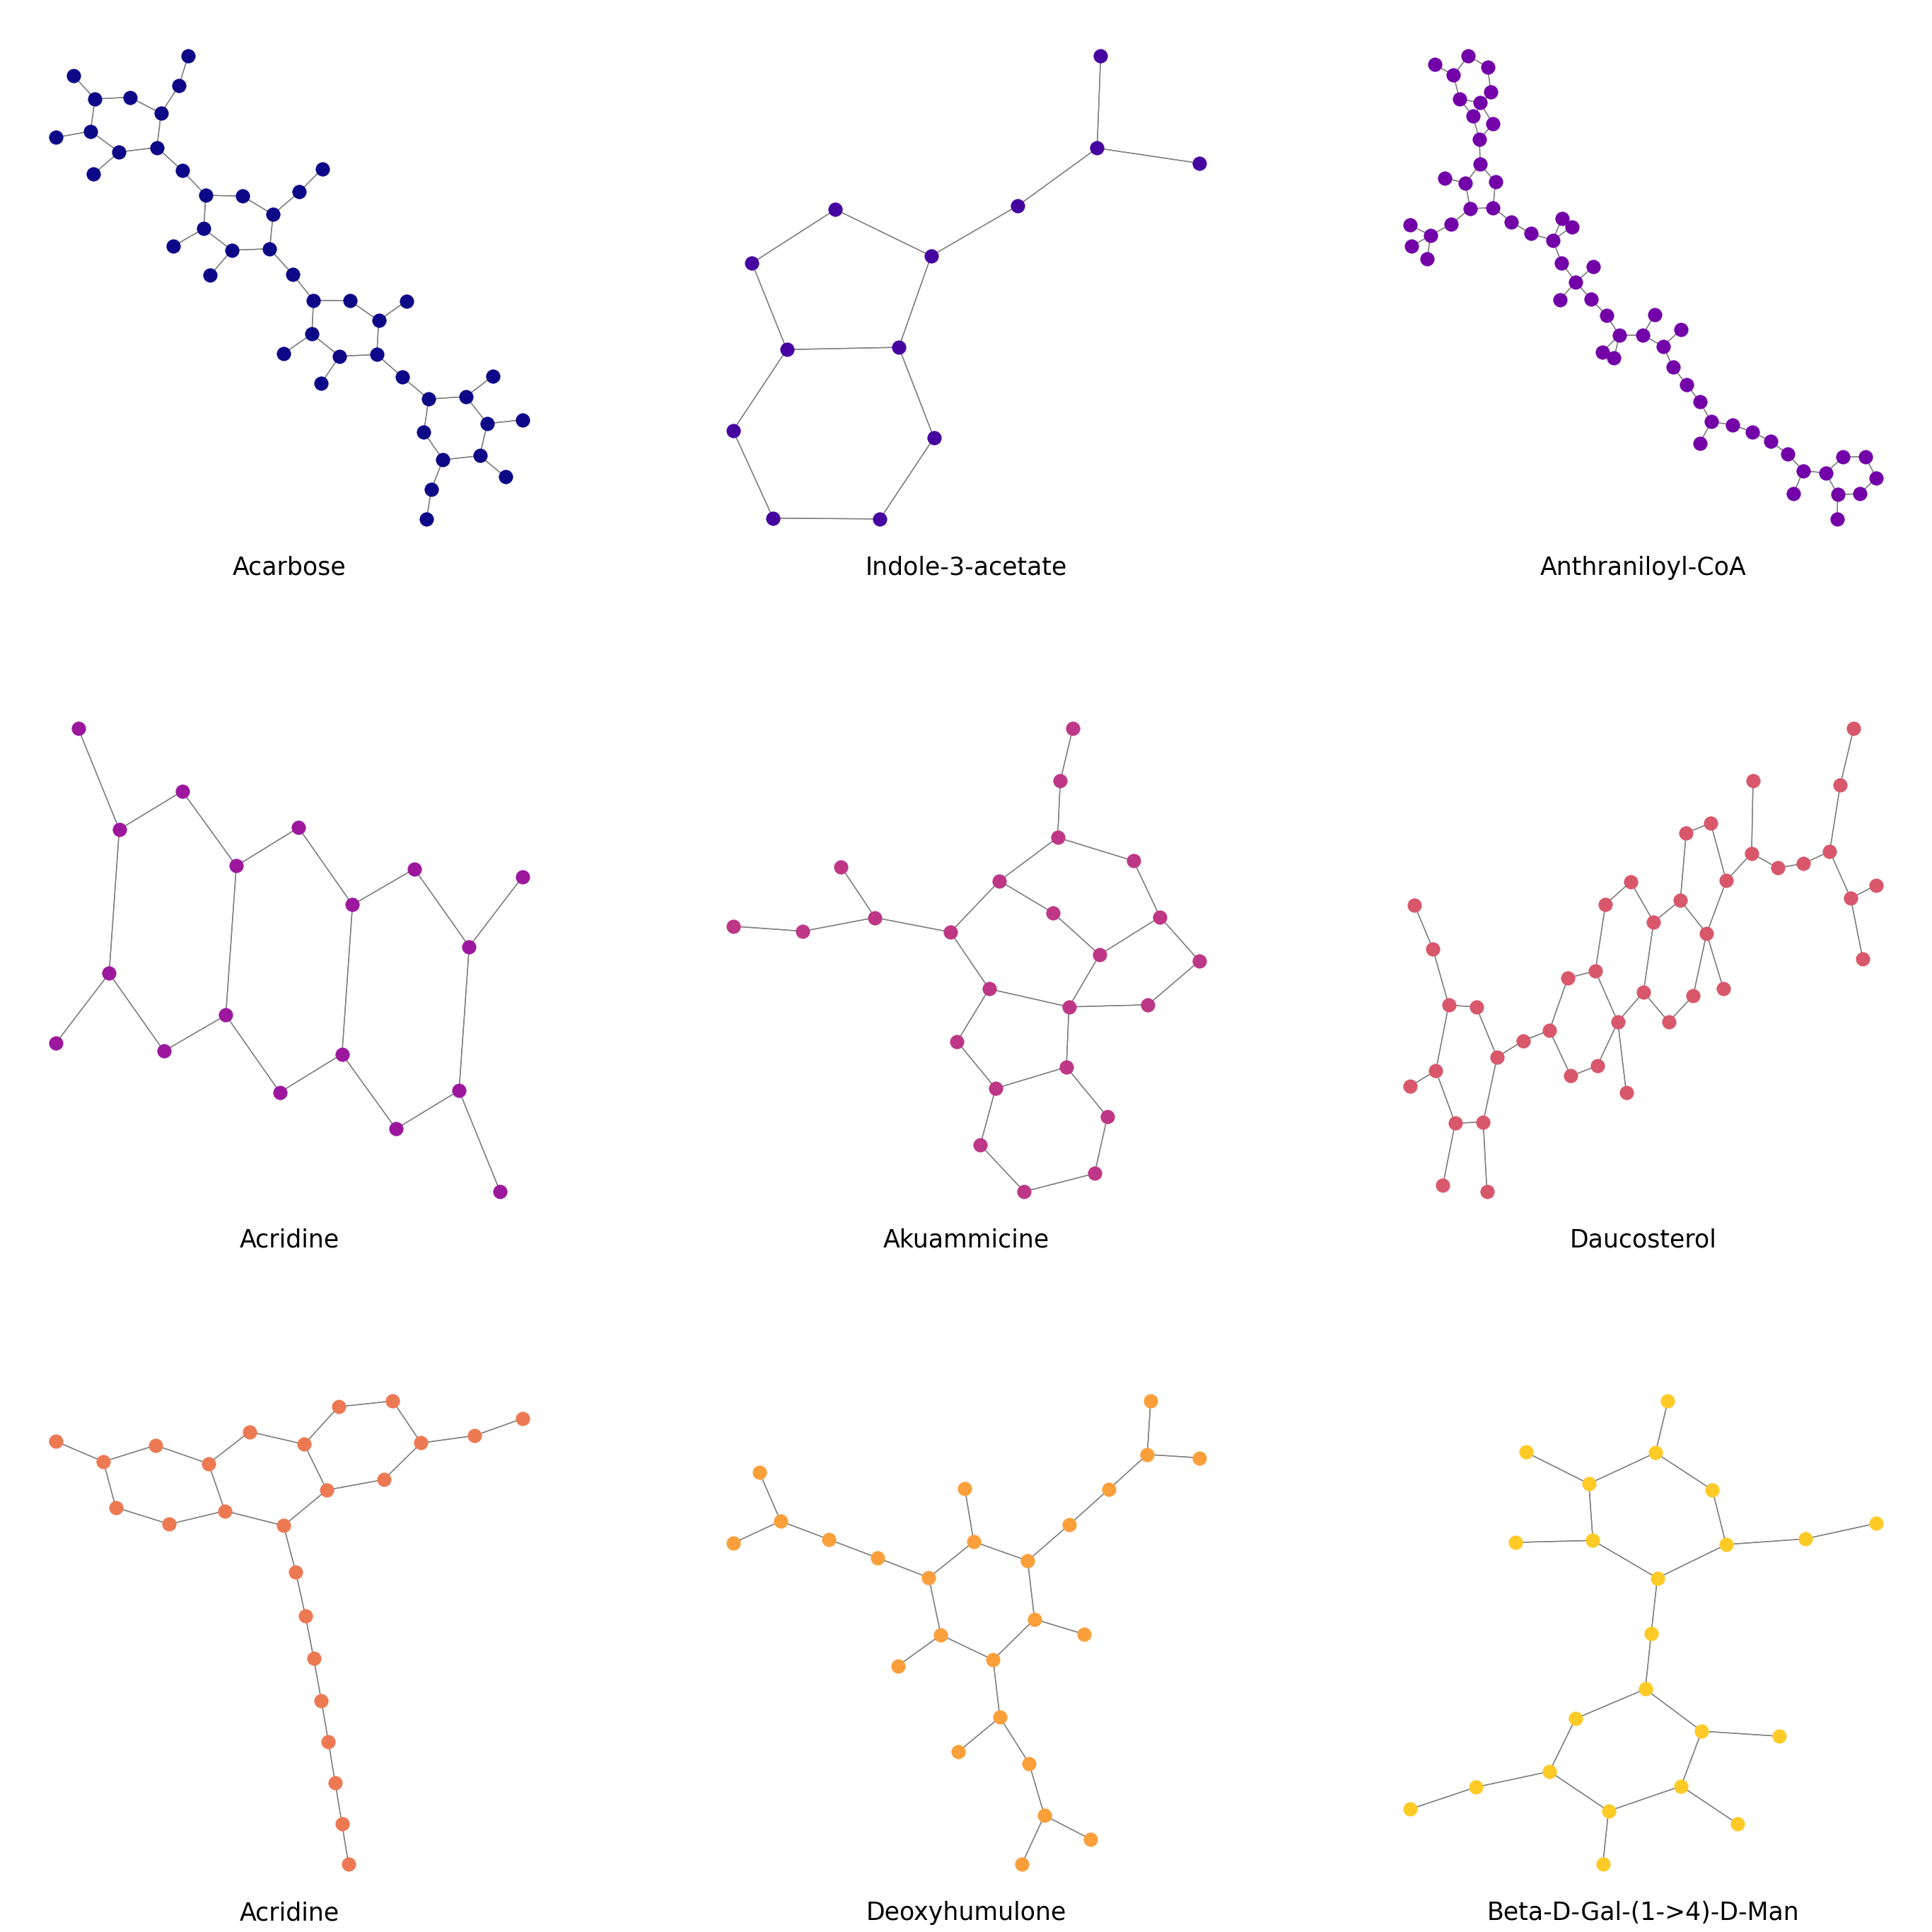

In [32]:
plt.figure(figsize=(35, 35))

idx = [898, 12479, 16152, 24357, 20691, 9779, 18325, 9452, 2087]

# Make grid of 5 x 5 graphs
# for i in range(16):
#     plt.subplot(4, 4, i + 1)
#     sample = train_dataset[rnd_idx[i]]
#     display(sample.edge_index)
#     plt.text(0.5, 0, sample.description[0].split()[0], horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=25)
#     plt.text(0.5, 1, rnd_idx[i], horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=25)
#     plt.axis('off')

colormap = plt.cm.plasma

for i in range(9):
    plt.subplot(3, 3, i + 1)
    sample = train_dataset[idx[i]]

    edges = sample.edge_index
    G = nx.DiGraph()
    for j in range(len(edges[0])):
        G.add_edge(int(edges[0][j]), int(edges[1][j]))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=False, font_size=8, node_size=200, edge_color='gray', linewidths=0.3, arrows=False, node_color=colormap(i/9))

    # display(sample.edge_index)
    plt.text(0.5, 0, sample.description[0].split()[0], horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=25)
    # plt.text(0.5, 1, rnd_idx[i], horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=25)
    plt.axis('off')

plt.savefig("graph_samples.png", dpi=100, transparent=True)

In [62]:
list(sample.x), list(sample.x_augment)

([tensor([ 9.9071e-03,  9.6214e-02,  5.7846e-02,  2.7340e-01, -3.0586e-02,
           3.6905e-01,  9.0718e-02,  4.6959e-01,  2.3344e-01,  4.3428e-01,
           3.5429e-02,  1.0500e-02,  4.0067e-01,  2.5114e-01, -2.7618e-01,
           2.3078e-01,  5.1529e-01,  6.4970e-02,  5.3601e-01,  6.0626e-02,
          -1.2717e-01,  4.6215e-01, -3.3702e-02,  2.3247e-01,  3.7872e-02,
          -1.1067e-01,  2.0282e-03, -3.8749e-01, -1.9044e-01,  1.0786e-01,
           1.9794e-01,  1.0330e-01,  9.6554e-02,  8.9131e-02, -6.6925e-02,
           1.9195e-01,  2.5035e-01,  2.1765e-01,  3.7391e-02, -1.3818e-01,
           7.8069e-02, -3.3157e-02,  4.1467e-01,  3.7851e-02, -2.6755e-01,
          -2.8276e-01,  5.3998e-03, -8.7742e-02, -1.0807e-02, -1.4401e-01,
           2.9688e-01,  1.1261e-01,  5.5644e-02,  2.6083e-01, -8.0224e-03,
          -1.1332e-01, -1.4928e-01,  2.0085e-01,  2.2493e-01,  4.6220e-01,
           5.2962e-02,  1.8020e-01, -9.5856e-02,  1.3715e-01,  1.0336e-01,
          -2.4976e-03, -1